<a href="https://colab.research.google.com/github/mmrepos/Genetic_Sequence_Analysis_Using_DNN/blob/main/Genetic_Sequence_Analysis_Using_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [173]:
#####################################################################################################################
#
#   Genetic sequence analysis using deep neural network analysis
#
#####################################################################################################################

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split, GridSearchCV
import warnings
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore', module='sklearn')
warnings.filterwarnings('ignore', module='IPython')

In [149]:
# Load the clinvar_conflicting.csv files and assign the variable name dataFile
dataFile = pd.read_csv\
(f'https://raw.githubusercontent.com/mmrepos/'\
'Genetic_Sequence_Analysis_Using_DNN/main/'
'Dataset/clinvar_conflicting.csv')
# Inspect the first ten records in the DataFrame
dataFile.head(10)

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,...,SIFT,PolyPhen,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
0,1,1168180,G,C,0.0771,0.10020,0.1066,MedGen:CN169374,NaN,not_specified,...,tolerated,benign,NaN,NaN,NaN,NaN,NaN,1.053,-0.208682,2.0
1,1,1470752,G,A,0.0000,0.00000,0.0000,"MedGen:C1843891,OMIM:607454,Orphanet:ORPHA9877...",NaN,Spinocerebellar_ataxia_21|not_provided,...,deleterious_low_confidence,benign,NaN,NaN,NaN,NaN,NaN,31.000,6.517838,-3.0
2,1,1737942,A,G,0.0000,0.00001,0.0000,"Human_Phenotype_Ontology:HP:0000486,MedGen:C00...",NaN,Strabismus|Nystagmus|Hypothyroidism|Intellectu...,...,deleterious,probably_damaging,NaN,NaN,NaN,NaN,NaN,28.100,6.061752,-1.0
3,1,2160305,G,A,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002...",NaN,Shprintzen-Goldberg_syndrome|not_provided,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.500,3.114491,NaN
4,1,2160305,G,T,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002",NaN,Shprintzen-Goldberg_syndrome,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.700,4.766224,-3.0
5,1,2160554,G,C,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002...",NaN,Shprintzen-Goldberg_syndrome|not_provided,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.700,4.079099,-2.0
6,1,3328358,T,C,0.0000,0.00000,0.0000,MedGen:CN169374,NaN,not_specified,...,NaN,NaN,NaN,NaN,NaN,NaN,0.101,0.172,-0.543433,-1.0
7,1,3328659,C,T,0.1523,0.13103,0.1060,MedGen:CN169374,NaN,not_specified,...,NaN,NaN,NaN,NaN,NaN,NaN,0.101,23.000,3.424422,-3.0
8,1,3347452,G,A,0.0000,0.00357,0.0030,"MedGen:C3809288,OMIM:615373|MedGen:CN169374|Me...",NaN,Left_ventricular_noncompaction_8|not_specified...,...,NaN,NaN,NaN,NaN,NaN,NaN,0.101,11.360,1.126629,1.0
9,1,5925304,G,A,0.0045,0.00231,0.0058,"MedGen:C0687120,Orphanet:ORPHA655,SNOMED_CT:20...",NaN,Nephronophthisis|not_specified,...,deleterious,benign,NaN,NaN,NaN,NaN,0.021,22.100,2.969650,-1.0


In [150]:
dataFile.shape

(65188, 46)

In [151]:
dataFile.CLASS.value_counts()

0    48754
1    16434
Name: CLASS, dtype: int64

In [152]:
# get unique values of a column in a Pandas dataframe
pd.DataFrame([[i, len(dataFile[i].unique())] 
              for i in dataFile.columns],
             columns=['Variable', 'Unique Values']).set_index('Variable')

,Unique Values
Variable,
CHROM,38
POS,63115
REF,866
ALT,458
AF_ESP,2842
AF_EXAC,6667
AF_TGP,2087
CLNDISDB,9234
CLNDISDBINCL,94


In [153]:
#
unique_columns = pd.DataFrame([[i, len(dataFile[i].unique())] for i in
                              dataFile.columns], columns=['Variable',
                              'Unique Values']).set_index('Variable')
to_drop = list(unique_columns[unique_columns['Unique Values']
               > 3000].index)
dataFile.drop(to_drop, axis=1, inplace=True)

In [154]:
pd.DataFrame([[i, len(dataFile[i].unique())] for i in dataFile.columns],
             columns=['Variable', 'Unique Values']).set_index('Variable'
        )

,Unique Values
Variable,
CHROM,38
REF,866
ALT,458
AF_ESP,2842
AF_TGP,2087
CLNDISDBINCL,94
CLNDNINCL,102
CLNSIGINCL,138
CLNVC,7


In [155]:
# Check and manage NULL values in the data frame.

number_missing = dataFile.isnull().sum()
percentage_missing = dataFile.isnull().sum().apply(lambda x: x \
        / dataFile.shape[0] * 100)

In [156]:
data_missing = pd.DataFrame({'Number Missing': number_missing,
                            'Percentage Missing': percentage_missing})

# Percentage of missing data in the dataframe in descending order

data_missing['Percentage Missing'].sort_values(ascending=False)

MOTIF_NAME            99.996932
MOTIF_SCORE_CHANGE    99.996932
HIGH_INF_POS          99.996932
MOTIF_POS             99.996932
DISTANCE              99.834325
SSR                   99.800577
CLNDISDBINCL          99.743818
CLNDNINCL             99.743818
CLNSIGINCL            99.743818
INTRON                86.495981
PolyPhen              61.962324
SIFT                  61.900963
BLOSUM62              60.739707
BAM_EDIT              50.958765
Amino_acids           15.346383
Codons                15.346383
LoFtool                6.462846
MC                     1.297785
SYMBOL                 0.024544
BIOTYPE                0.024544
STRAND                 0.021476
Feature_type           0.021476
Feature                0.021476
REF                    0.000000
IMPACT                 0.000000
Consequence            0.000000
Allele                 0.000000
CLASS                  0.000000
ORIGIN                 0.000000
CLNVC                  0.000000
AF_TGP                 0.000000
AF_ESP  

In [157]:
# Drop the columns where >= 20% of the data is missing

list_to_drop = list(data_missing[data_missing['Percentage Missing']
                 >= 20].index)
dataFile.drop(list_to_drop, axis=1, inplace=True)

# Check the NULL values in a data frame.

dataFile.isnull().sum()

CHROM               0
REF                 0
ALT                 0
AF_ESP              0
AF_TGP              0
CLNVC               0
MC                846
ORIGIN              0
CLASS               0
Allele              0
Consequence         0
IMPACT              0
SYMBOL             16
Feature_type       14
Feature            14
BIOTYPE            16
Amino_acids     10004
Codons          10004
STRAND             14
LoFtool          4213
dtype: int64

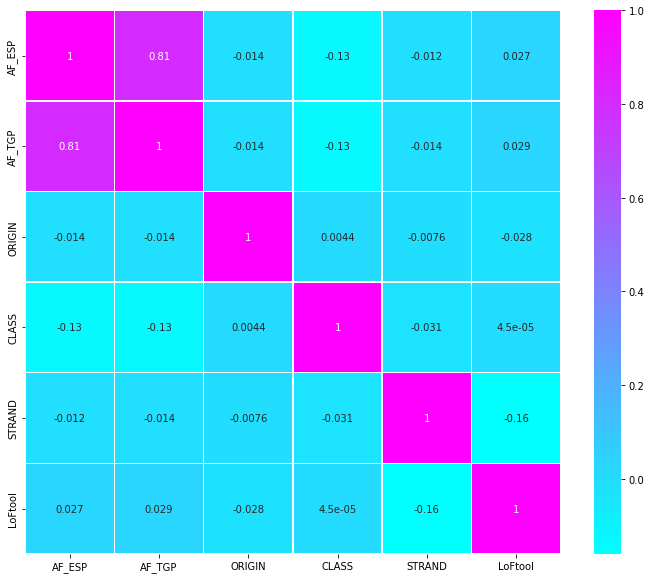

In [158]:
# Create a new figure with the specified width and height
# Display dataFrame as heatmap

plt.figure(figsize=(12, 10))
sns.heatmap(dataFile.corr(), annot=True, linewidths=.5, cmap=plt.cm.cool)

In [159]:
# Drop the AF_TGP column that is strongly correlated
# Correlation for AF_ESP with AF_TGP is above 0.8

dataFile.drop(['AF_TGP'],axis = 1, inplace=True)

In [160]:
# Return the data type of each column in the DataFrame
# count the number of missing values instead.
# dataFile.isnull().sum() returns the number of missing values for each column

df_data = pd.DataFrame(dataFile.isnull().sum().astype(int),
                       columns=['Null'])
nullList = list(df_data[df_data['Null'] != 0].index)
dataFile[nullList].dtypes

MC               object
SYMBOL           object
Feature_type     object
Feature          object
BIOTYPE          object
Amino_acids      object
Codons           object
STRAND          float64
LoFtool         float64
dtype: object

In [161]:
# Feature Transformation
# Replace nan with most frequent value in these columns
# Columns: MC, SYMBOL, Feature_type, Feature, BIOTYPE, Amino_acids, Codons, STRAND

for x in [
    'MC',
    'SYMBOL',
    'Feature_type',
    'Feature',
    'BIOTYPE',
    'STRAND',
    'Amino_acids',
    'Codons',
    ]:
    dataFile[x].fillna(dataFile[x].mode()[0], inplace=True)

# Replace the nan value in LoFtool column with mean

dataFile['LoFtool'].fillna(dataFile['LoFtool'].mean(), inplace=True)

# check NULL values in a data frame

dataFile.isnull().sum()

CHROM           0
REF             0
ALT             0
AF_ESP          0
CLNVC           0
MC              0
ORIGIN          0
CLASS           0
Allele          0
Consequence     0
IMPACT          0
SYMBOL          0
Feature_type    0
Feature         0
BIOTYPE         0
Amino_acids     0
Codons          0
STRAND          0
LoFtool         0
dtype: int64

In [162]:
# Look at the number of unique values each variable takes, and then create
# and then create list variables for numeric, binary, categorical, and ordinal variables.

dt = pd.DataFrame([[str(i), dataFile[i].dtypes == 'object'] for i in
                  dataFile.columns], columns=['Variable', 'Object Type'
                  ]).set_index('Variable')
columns_object_type = list(dt[dt['Object Type'] == True].index)

In [163]:
# Unique value on each column in dataframe

df_data = dataFile[columns_object_type]
df_unique_values = pd.DataFrame([[i, len(df_data[i].unique())] for i in
                                df_data.columns], columns=['Variable',
                                'Unique Values']).set_index('Variable')
df_unique_values

,Unique Values
Variable,
CHROM,38
REF,866
ALT,458
CLNVC,7
MC,90
Allele,374
Consequence,48
IMPACT,4
SYMBOL,2328


In [164]:
# Check which variables are binary

variables_bin = list(df_unique_values[df_unique_values['Unique Values']
                     == 2].index)
variables_bin

['Feature_type', 'BIOTYPE']

In [165]:
# Check which variables are categorical

variables_categorical = list(df_unique_values[df_unique_values['Unique Values']
                     > 2].index)
variables_categorical

['CHROM',
 'REF',
 'ALT',
 'CLNVC',
 'MC',
 'Allele',
 'Consequence',
 'IMPACT',
 'SYMBOL',
 'Feature',
 'Amino_acids',
 'Codons']

In [166]:
# Apply function with lambda along the row

for col in variables_categorical:
    dataFile[col] = dataFile[col].apply(lambda x: str(x))

dataFile[variables_categorical].dtypes

CHROM          object
REF            object
ALT            object
CLNVC          object
MC             object
Allele         object
Consequence    object
IMPACT         object
SYMBOL         object
Feature        object
Amino_acids    object
Codons         object
dtype: object

In [167]:
# numeric

variables_numeric = list(set(dataFile.columns)
                         - set(variables_categorical)
                         - set(variables_bin))
dataFile[variables_numeric].dtypes

ORIGIN       int64
LoFtool    float64
CLASS        int64
STRAND     float64
AF_ESP     float64
dtype: object

In [168]:
# LabelBinarizer makes this process easy with the transform method.
# Accepts Categorical data as input and returns an Numpy array.
# Encode target labels with value between 0 and n_classes-1.
# To encode target values, i.e. y , and not the input X

(lb, le) = (LabelBinarizer(), LabelEncoder())

# Encode target labels ordinary variables

for col in variables_categorical:
    dataFile[col] = le.fit_transform(dataFile[col])

# Encode target labels ordinary variables encoding binary variables

for col in variables_bin:
    dataFile[col] = lb.fit_transform(dataFile[col])

dataFile.sample(5)

,CHROM,REF,ALT,AF_ESP,CLNVC,MC,ORIGIN,CLASS,Allele,Consequence,IMPACT,SYMBOL,Feature_type,Feature,BIOTYPE,Amino_acids,Codons,STRAND,LoFtool
32823,8,437,0,0.0001,6,81,1,0,1,31,1,198,1,2101,1,78,1163,-1.0,0.224000
57482,19,224,335,0.0000,6,19,1,1,296,17,2,581,1,658,1,926,358,1.0,0.345058
41786,11,437,0,0.0014,6,19,1,1,1,17,2,2207,1,648,1,1075,740,-1.0,0.971000
60591,20,224,335,0.0001,6,19,1,0,296,17,2,1601,1,1988,1,377,523,-1.0,0.009990
47322,14,644,106,0.0000,6,19,1,0,88,17,2,383,1,339,1,274,1516,-1.0,0.356000


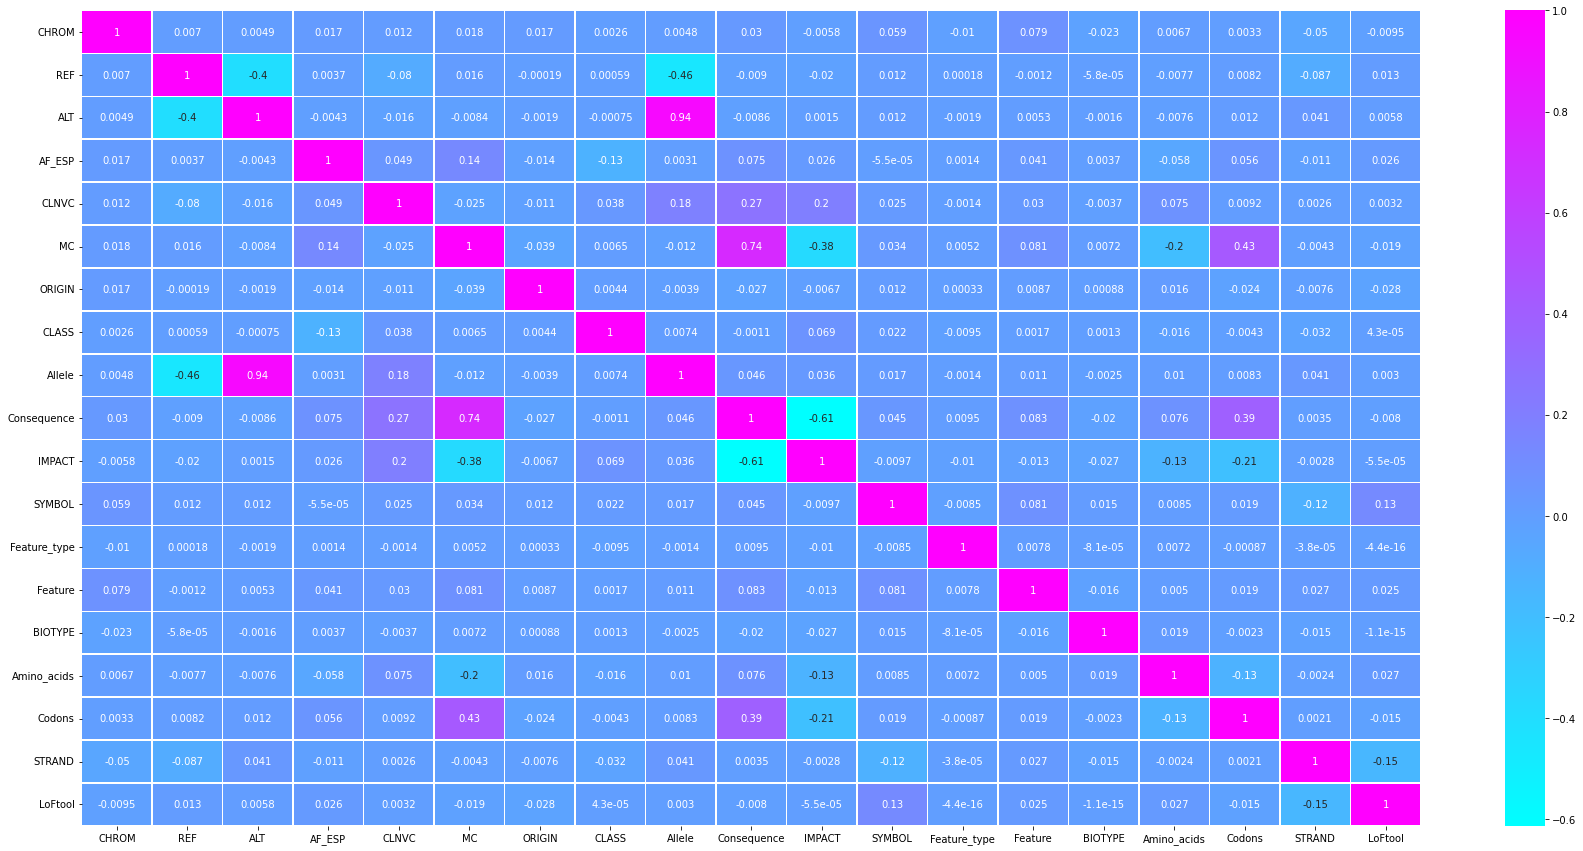

In [169]:
# Display dataFrame as heatmap

plt.figure(figsize=(30, 15))
sns.heatmap(dataFile.corr(), annot=True, linewidths=.5,
            cmap=plt.cm.cool)

In [170]:
# Drop the ALT and MC columns that are strongly correlated
# Correlation for ALT with MC and Allele  is above 0.8

dataFile.drop(['ALT', 'MC'], axis=1, inplace=True)
variables_categorical.remove('ALT')
variables_categorical.remove('MC')

In [171]:
# Transform features by scaling each feature to a given range.
# The default range for the feature returned by MinMaxScaler is 0 to 1.

mm = MinMaxScaler()
for column in [variables_categorical + variables_numeric]:
    dataFile[column] = mm.fit_transform(dataFile[column])

In [172]:
feature_columns = list(dataFile.columns)
feature_columns.remove('CLASS')

In [175]:
# Split the data into test and train data sets
# Using StratifiedShuffleSplit so proportion of distribution of
# class labels is almost even between train and test dataset.

# Using StratifiedShuffleSplit() to get the split indexes

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

(train_index, test_index) = next(sss.split(dataFile[feature_columns],
                                 dataFile.CLASS))

# Creating dataframes

X_train = dataFile.loc[train_index, feature_columns]
y_train = dataFile.loc[train_index, 'CLASS']

X_test = dataFile.loc[test_index, feature_columns]
y_test = dataFile.loc[test_index, 'CLASS']
(len(X_test), len(X_train))

(19557, 45631)

In [176]:
def train_evaluate(self):
        ncols = len(self.processed_data.columns)
        nrows = len(self.processed_data.index)
        X = self.processed_data.iloc[:, 0:(ncols - 1)]
        y = self.processed_data.iloc[:, (ncols - 1)]
        X_train, X_test, y_train, y_test = train_test_split(
            X, y)